In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


% load file names 

In [2]:
import os
import pandas as pd

Emil = True

if Emil:
    base_path = r"C:\Users\ASUS\Documents\11. sem - kand\Data\Frequency"
else:
    base_path = r"C:\Users\Gustav\Documents\Thesis\data\Frequency"


In [3]:
import os

# Specify the folder path
folder_path = base_path

# Get a list of all files in the folder
file_names = os.listdir(folder_path)


In [7]:
file_names

['2022-03-23.csv',
 '2022-03-24.csv',
 '2022-03-25.csv',
 '2022-03-26.csv',
 '2022-03-27.csv',
 '2022-03-28.csv',
 '2022-03-29.csv',
 '2022-03-30.csv',
 '2022-03-31.csv',
 '2022-04-01.csv',
 '2022-04-02.csv',
 '2022-04-03.csv',
 '2022-04-04.csv',
 '2022-04-05.csv',
 '2022-04-06.csv',
 '2022-04-07.csv',
 '2022-04-08.csv',
 '2022-04-09.csv',
 '2022-04-10.csv',
 '2022-04-11.csv',
 '2022-04-12.csv',
 '2022-04-13.csv',
 '2022-04-14.csv',
 '2022-04-15.csv',
 '2022-04-16.csv',
 '2022-04-17.csv',
 '2022-04-18.csv',
 '2022-04-19.csv',
 '2022-04-20.csv',
 '2022-04-21.csv',
 '2022-04-22.csv',
 '2022-04-23.csv',
 '2022-04-24.csv',
 '2022-04-25.csv',
 '2022-04-26.csv',
 '2022-04-27.csv',
 '2022-04-28.csv',
 '2022-04-29.csv',
 '2022-04-30.csv',
 '2022-05-01.csv',
 '2022-05-02.csv',
 '2022-05-03.csv',
 '2022-05-04.csv',
 '2022-05-05.csv',
 '2022-05-06.csv',
 '2022-05-07.csv',
 '2022-05-08.csv',
 '2022-05-09.csv',
 '2022-05-10.csv',
 '2022-05-11.csv',
 '2022-05-12.csv',
 '2022-05-13.csv',
 '2022-05-14

In [4]:
import os
import pandas as pd

# Create a dictionary to store the loaded dataframes
dataframes = {}

# Create a list to store the dataframe names
dataframe_names = []

# Load the CSV files and store them in the dictionary
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    dataframe_name = file_name  # Remove the ".csv" extension and the first 3 characters, so only the CD numer is there
    dataframes[dataframe_name] = pd.read_csv(file_path, parse_dates=['Time'])
    dataframe_names.append(dataframe_name)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf8 in position 14: invalid start byte

In [5]:
dataframes

{'2022-03-23.csv':                           Time     Value
 0      2022-03-23 00:00:00.000  50.05250
 1      2022-03-23 00:00:00.100  50.05258
 2      2022-03-23 00:00:00.200  50.05353
 3      2022-03-23 00:00:00.300  50.05216
 4      2022-03-23 00:00:00.400  50.05318
 ...                        ...       ...
 718261 2022-03-23 23:59:59.500  50.04286
 718262 2022-03-23 23:59:59.600  50.04253
 718263 2022-03-23 23:59:59.700  50.04073
 718264 2022-03-23 23:59:59.800  50.04154
 718265 2022-03-23 23:59:59.900  50.04078
 
 [718266 rows x 2 columns],
 '2022-03-24.csv':                           Time     Value
 0      2022-03-24 00:00:00.000  50.03944
 1      2022-03-24 00:00:00.100  50.03922
 2      2022-03-24 00:00:00.200  50.03865
 3      2022-03-24 00:00:00.300  50.03873
 4      2022-03-24 00:00:00.400  50.04094
 ...                        ...       ...
 863757 2022-03-24 23:59:59.500  50.07795
 863758 2022-03-24 23:59:59.600  50.07851
 863759 2022-03-24 23:59:59.700  50.07812
 863760 20

run field below to get average up and down activation for each minute, i.e. to get activation energy

In [ ]:
A_d = [0 for _ in range(60 * 24 * 365)]
A_u = [0 for _ in range(60 * 24 * 365)]

count_up = 0 
count_do = 0 

for d in range(364):
    #start_time += pd.Timedelta(days=1)
    # Load your CSV file
    df = dataframes[dataframe_names[d]]

    # Define your start and end times
    current_time = df['Time'][0]


    print(d)
    
    j = 0
    end_j = False 
    for t in range(24):
        for m in range(60):
            current_time += pd.Timedelta(minutes=1)
            m_ts = 0 # number of times stamps in the given minute
            if end_j == False:
                while current_time > df['Time'][j]:
                    m_ts = m_ts + 1 
                    f_d = -50 + df['Value'][j]  # get the difference from normel freq

                    # compute the down regualtion activation 
                    if f_d < -0.1:
                        f_d = f_d+0.1
                        ac = f_d/(-0.4)
                        if ac > 1:
                            ac = 1  
                            print(j)
                        A_u[m + (t-1)*60 +(d-1)*1440 ] = A_u[m + (t-1)*60 +(d-1)*1440 ]+ac

                    # compute the up regualtion activation 
                    if f_d > 0.1:
                        f_d = f_d-0.1
                        ac = f_d/(0.4)
                        if ac > 1:
                            ac = 1 
                            print(j)
                        A_d[m + (t-1)*60 +(d-1)*1440 ] = A_d[m + (t-1)*60 +(d-1)*1440 ]+ac
                    
                    if  (50.5 < df['Value'][j] or 49.5 > df['Value'][j]) and ac != 1: # checker 
                        print("there was a mistake!")
                        print(t)
                        print(m)

                    j = j +1
                    
                    if j >= (len(df)-1):
                        end_j = True 
                        break

                if  A_d[m + (t-1)*60 +(d-1)*1440  ] > 0:
                    count_up = count_up + 1 # counter number of minutes we're activated
                if  A_u[m + (t-1)*60 +(d-1)*1440  ] > 0:
                    count_do = count_do + 1 # counter number of minutes we're activated
                if m_ts == 0:
                    A_d[m + (t-1)*60 +(d-1)*1440 ] = 0
                    A_u[m + (t-1)*60 +(d-1)*1440 ] = 0
                else: 
                    A_d[m + (t-1)*60 +(d-1)*1440  ] = A_d[m + (t-1)*60 +(d-1)*1440  ]/m_ts # take the average activation 
                    A_u[m + (t-1)*60 +(d-1)*1440  ] = A_u[m + (t-1)*60 +(d-1)*1440  ]/m_ts # take the average activation 
                
            
        




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
176183
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
763760
763761
763762
763763
763764
763765
763766
763767
763778
763779
763780
763781
763782
763783
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
777270
777271
777272
777273
777274
777275
777276
777277
777278
777279
777280
777281
777282
777283
777284
777285
777286
777287
777288
777289
777290
777291
777292
777293
777294
777295
777296
777297
777298
777299
777300
777301
777302
777303
777304
777305
777306
77

0.0018963371385082978

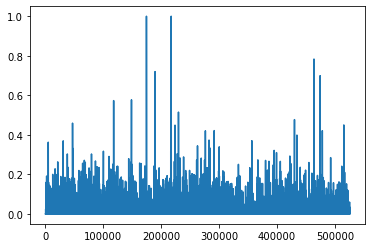

In [18]:
plt.plot(A_d)

sum(A_d)/(60 * 24 * 365)

In [19]:
count/(60*24*365)

NameError: name 'count' is not defined

In [29]:
# Create a DataFrame from the lists
df_activation = pd.DataFrame({'activation upwards': A_u, 'activations downwards': A_d})

# Save the DataFrame to an Excel file
df_activation.to_excel(r'C:\Users\Gustav\Documents\Thesis\data\Activation.xlsx', index=False)



run field below to get maximum up and down activation for each minute, i.e. see if we can meet the activation 

In [8]:
A_d = [0 for _ in range(60 * 24 * 365)]
A_u = [0 for _ in range(60 * 24 * 365)]

count_up = 0 
count_do = 0 

for d in range(364):
    #start_time += pd.Timedelta(days=1)
    # Load your CSV file
    df = dataframes[dataframe_names[d]]

    # Define your start and end times
    current_time = df['Time'][0]


    print(d)
    
    j = 0
    end_j = False 
    for t in range(24):
        for m in range(60):
            current_time += pd.Timedelta(minutes=1)
            if end_j == False:
                while current_time > df['Time'][j]:
                    f_d = -50 + df['Value'][j]  # get the difference from normel freq

                    # compute the down regualtion activation 
                    if f_d < -0.1:
                        f_d = f_d+0.1
                        ac = f_d/(-0.4)
                        if ac > 1:
                            ac = 1  
                            print(j)
                            
                        if ac > A_u[m + (t-1)*60 +(d-1)*1440 ]: 
                            A_u[m + (t-1)*60 +(d-1)*1440 ] = ac

                    # compute the up regualtion activation 
                    if f_d > 0.1:
                        f_d = f_d-0.1
                        ac = f_d/(0.4)
                        if ac > 1:
                            ac = 1 
                            print(j)
                        if ac > A_d[m + (t-1)*60 +(d-1)*1440 ]: 
                            A_d[m + (t-1)*60 +(d-1)*1440 ] = ac
                    
                    if  (50.5 < df['Value'][j] or 49.5 > df['Value'][j]) and ac != 1: # checker 
                        print("there was a mistake!")
                        print(t)
                        print(m)

                    j = j +1
                    
                    if j >= (len(df)-1):
                        end_j = True 
                        break

                if  A_d[m + (t-1)*60 +(d-1)*1440  ] > 0:
                    count_up = count_up + 1 # counter number of minutes we're activated
                if  A_u[m + (t-1)*60 +(d-1)*1440  ] > 0:
                    count_do = count_do + 1 # counter number of minutes we're activated
                
                
            
        



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
176183
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
763760
763761
763762
763763
763764
763765
763766
763767
763778
763779
763780
763781
763782
763783
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
777270
777271
777272
777273
777274
777275
777276
777277
777278
777279
777280
777281
777282
777283
777284
777285
777286
777287
777288
777289
777290
777291
777292
777293
777294
777295
777296
777297
777298
777299
777300
777301
777302
777303
777304
777305
777306
77

In [16]:
# Create a DataFrame from the lists
df_activation = pd.DataFrame({'activation upwards': A_u, 'activations downwards': A_d})

# Save the DataFrame to an Excel file
# df_activation.to_excel(r'C:\Users\Gustav\Documents\Thesis\data\Max_Activation.xlsx', index=False)

In [26]:
count_up/(60*24*363)

0.038414447505356594

In [25]:
count_do/(60*24*363)

0.032348102234465874

In [39]:
def mean_and_max_of_non_zero_elements(numbers):
    # Filter out the zero elements
    non_zero_numbers = [num for num in numbers if num != 0]
    
    count_of_ones = numbers.count(1)

    # Calculate the mean and find the max of non-zero elements
    if non_zero_numbers:
        mean_value = sum(non_zero_numbers) / len(non_zero_numbers)
        max_value = max(non_zero_numbers)
        return mean_value, max_value, count_of_ones
    else:
        return 0, 0, 0  # Return 0, 0 if there are no non-zero elements

# Example usage
my_list = [0, 1, 2, 3, 0, 4, 5]
mean_value, max_value, count_of_ones = mean_and_max_of_non_zero_elements(A_u)
print("Mean of non-zero elements:", mean_value)
print("Max of non-zero elements:", max_value)
print("Count of ones:", count_of_ones)


Mean of non-zero elements: 0.048270018924831105
Max of non-zero elements: 1
Count of ones: 3


In [17]:
df_activation

,activation upwards,activations downwards
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
525595,0.0,0.0
525596,0.0,0.0
525597,0.0,0.0
525598,0.0,0.0
